In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [6]:
pip install pandas requests

In [12]:
import requests

symbols = ['AAPL','GOOG','MSFT','AMZN']

api_key = '#apikey

# Initialize an empty DataFrame to store your data
data_df = pd.DataFrame()
all_data = []
data_frames = {}
# Loop through each symbol
for symbol in symbols:
    # Endpoint URL for fetching historical prices for the given symbol
    url = f'https://cloud.iexapis.com/stable/stock/{symbol}/chart/1m?token={api_key}'

    # Make the API request
    response = requests.get(url)

    # Convert the response to JSON
    data = response.json()
    symbol_df = pd.DataFrame(data)

    # Store the DataFrame in the dictionary with the symbol as the key
    data_frames[symbol] = symbol_df
print(data_frames['AAPL'].head())

    close      high     low    open   priceDate symbol    volume  \
0  170.73  173.7000  168.94  169.00  2024-03-08   AAPL  76267041   
1  172.75  174.3800  172.05  172.94  2024-03-11   AAPL  60139473   
2  173.23  174.0300  171.01  173.15  2024-03-12   AAPL  59825372   
3  171.13  173.1850  170.76  172.77  2024-03-13   AAPL  52488692   
4  173.00  174.3078  172.05  172.91  2024-03-14   AAPL  72913507   

                  id   key subkey  ...    uLow   uVolume   fOpen  fClose  \
0  HISTORICAL_PRICES  AAPL         ...  168.94  76267041  169.00  170.73   
1  HISTORICAL_PRICES  AAPL         ...  172.05  60139473  172.94  172.75   
2  HISTORICAL_PRICES  AAPL         ...  171.01  59825372  173.15  173.23   
3  HISTORICAL_PRICES  AAPL         ...  170.76  52488692  172.77  171.13   
4  HISTORICAL_PRICES  AAPL         ...  172.05  72913507  172.91  173.00   

      fHigh    fLow   fVolume       label  change  changePercent  
0  173.7000  168.94  76267041   Mar 8, 24    0.00         0.0000  


In [13]:
data_frames['AMZN'].head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,175.350,178.785,174.330,176.44,2024-03-08,AMZN,37893242,HISTORICAL_PRICES,AMZN,,...,174.330,37893242,176.44,175.350,178.785,174.330,37893242,"Mar 8, 24",0.000,0.0000
1,171.960,174.470,171.470,174.31,2024-03-11,AMZN,28484777,HISTORICAL_PRICES,AMZN,,...,171.470,28484777,174.31,171.960,174.470,171.470,28484777,"Mar 11, 24",-3.390,-0.0193
2,175.390,176.760,171.980,173.50,2024-03-12,AMZN,36610604,HISTORICAL_PRICES,AMZN,,...,171.980,36610604,173.50,175.390,176.760,171.980,36610604,"Mar 12, 24",3.430,0.0199
3,176.555,177.620,175.550,175.90,2024-03-13,AMZN,30772600,HISTORICAL_PRICES,AMZN,,...,175.550,30772600,175.90,176.555,177.620,175.550,30772600,"Mar 13, 24",1.165,0.0066
4,178.750,179.530,176.465,177.69,2024-03-14,AMZN,43705840,HISTORICAL_PRICES,AMZN,,...,176.465,43705840,177.69,178.750,179.530,176.465,43705840,"Mar 14, 24",2.195,0.0124


In [14]:
data_frames['AMZN'].describe()

,close,high,low,open,volume,updated,changeOverTime,marketChangeOverTime,uOpen,uClose,uHigh,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,change,changePercent
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,178.266750,179.912250,176.644555,178.136250,3.530712e+07,1.711678e+12,0.016634,0.016634,178.136250,178.266750,179.912250,176.644555,3.530712e+07,178.136250,178.266750,179.912250,176.644555,3.530712e+07,0.486000,0.002775
std,3.107544,2.998155,2.875912,2.805192,1.001487e+07,1.052404e+09,0.017722,0.017722,2.805192,3.107544,2.998155,2.875912,1.001487e+07,2.805192,3.107544,2.998155,2.875912,1.001487e+07,2.192009,0.012317
min,171.960000,174.470000,171.470000,173.500000,2.688089e+07,1.709951e+12,-0.019333,-0.019333,173.500000,171.960000,174.470000,171.470000,2.688089e+07,173.500000,171.960000,174.470000,171.470000,2.688089e+07,-4.330000,-0.024200
25%,175.772500,177.852500,174.317500,176.080000,2.977634e+07,1.710533e+12,0.002409,0.002409,176.080000,175.772500,177.852500,174.317500,2.977634e+07,176.080000,175.772500,177.852500,174.317500,2.977634e+07,-0.070000,-0.000375
50%,178.525000,179.765000,176.995000,177.881000,3.193112e+07,1.712355e+12,0.018107,0.018107,177.881000,178.525000,179.765000,176.995000,3.193112e+07,177.881000,178.525000,179.765000,176.995000,3.193112e+07,0.655000,0.003650
75%,180.095000,181.486250,178.597150,180.028500,3.793283e+07,1.712555e+12,0.027060,0.027060,180.028500,180.095000,181.486250,178.597150,3.793283e+07,180.028500,180.095000,181.486250,178.597150,3.793283e+07,1.577500,0.008825
max,185.070000,186.270000,181.970000,184.000000,7.214739e+07,1.712601e+12,0.055432,0.055432,184.000000,185.070000,186.270000,181.970000,7.214739e+07,184.000000,185.070000,186.270000,181.970000,7.214739e+07,5.070000,0.028200


In [15]:
data_frames['AMZN'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 20 non-null     float64
 1   high                  20 non-null     float64
 2   low                   20 non-null     float64
 3   open                  20 non-null     float64
 4   priceDate             20 non-null     object 
 5   symbol                20 non-null     object 
 6   volume                20 non-null     int64  
 7   id                    20 non-null     object 
 8   key                   20 non-null     object 
 9   subkey                20 non-null     object 
 10  date                  20 non-null     object 
 11  updated               20 non-null     int64  
 12  changeOverTime        20 non-null     float64
 13  marketChangeOverTime  20 non-null     float64
 14  uOpen                 20 non-null     float64
 15  uClose                20 

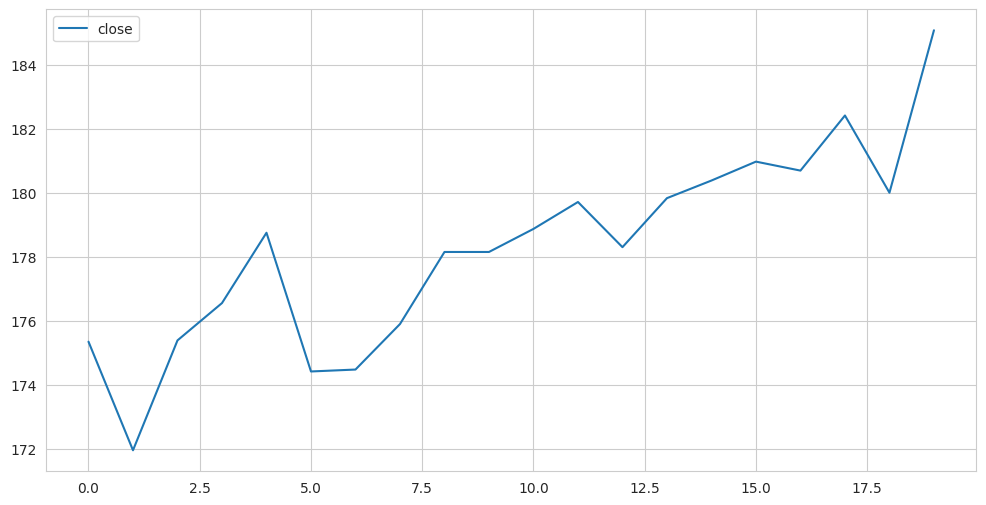

In [16]:
data_frames['AMZN']['close'].plot(legend=True, figsize = (12, 6))
plt.show()

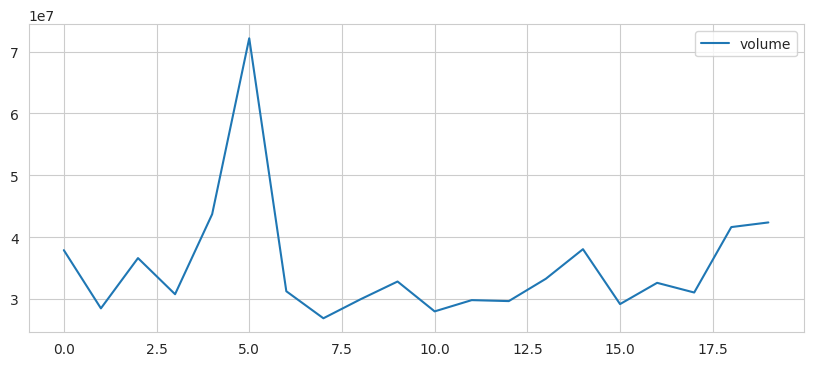

In [17]:
data_frames['AMZN']['volume'].plot(legend=True,figsize=(10,4))
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data_frames['AMZN'][column_name]=pd.DataFrame.rolling(data_frames['AMZN']['close'],ma).mean()

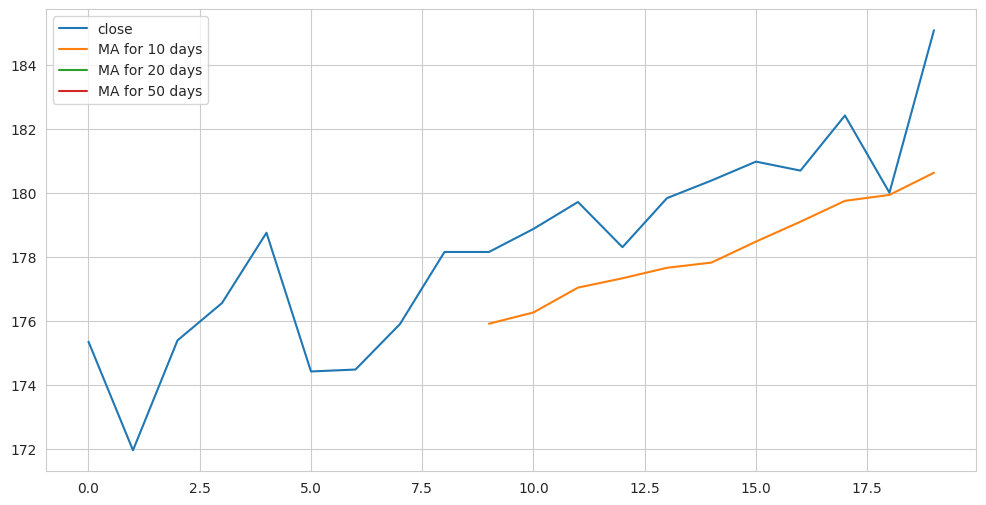

In [22]:
data_frames['AMZN'][['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

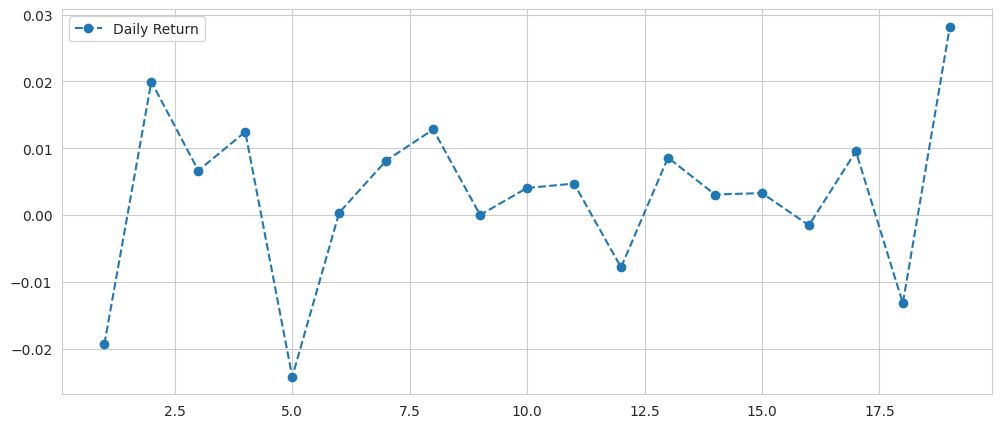

In [24]:
 data_frames['AMZN']['Daily Return'] =  data_frames['AMZN']['close'].pct_change()
# plot the daily return percentage
 data_frames['AMZN']['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
 plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

<ipython-input-25-f4381df2ed01>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frames['AMZN']['Daily Return'].dropna(),bins=100,color='blue')


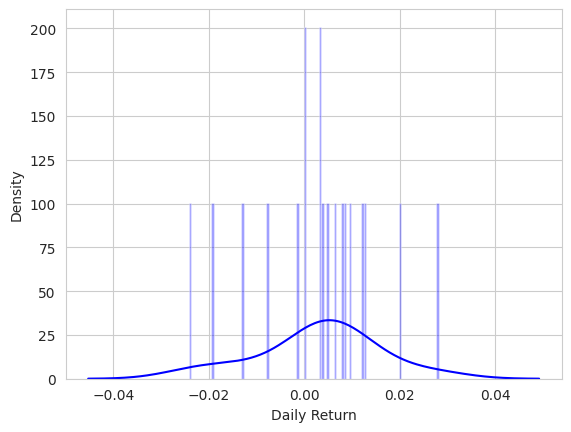

In [25]:
sns.distplot(data_frames['AMZN']['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

In [27]:
closing_df1 = pd.DataFrame(data_frames['AAPL']['close'])
close1  = closing_df1.rename(columns={"close": "AAPL_close"})

closing_df2 = pd.DataFrame(data_frames['GOOG']['close'])
close2  = closing_df2.rename(columns={"close": "GOOG_close"})

closing_df3 = pd.DataFrame(data_frames['MSFT']['close'])
close3  = closing_df3.rename(columns={"close": "MSFT_close"})

closing_df4 = pd.DataFrame(data_frames['AMZN']['close'])
close4  = closing_df4.rename(columns={"close": "AMZN_close"})

closing_df = pd.concat([close1, close2, close3, close4], axis=1)
closing_df.head()

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
0,170.73,136.29,406.22,175.350
1,172.75,138.94,404.52,171.960
2,173.23,139.62,415.28,175.390
3,171.13,140.77,415.10,176.555
4,173.00,144.34,425.22,178.750


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [28]:
tech_returns = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

In [30]:
pip install seaborn


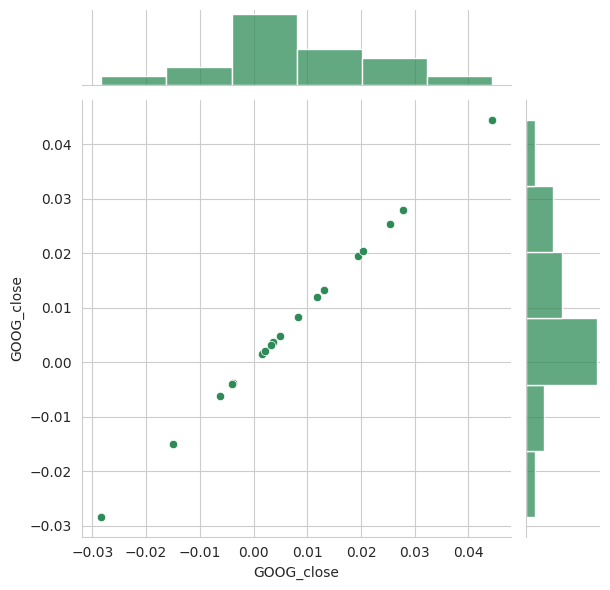

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tech_returns' is a DataFrame that includes a column 'GOOG_close' for Google's closing prices
# Here's how you might correctly use sns.jointplot to illustrate the distribution of Google's closing prices
sns.jointplot(x='GOOG_close', y='GOOG_close', data=tech_returns, kind='scatter', color='seagreen')

# Display the plot
plt.show()


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

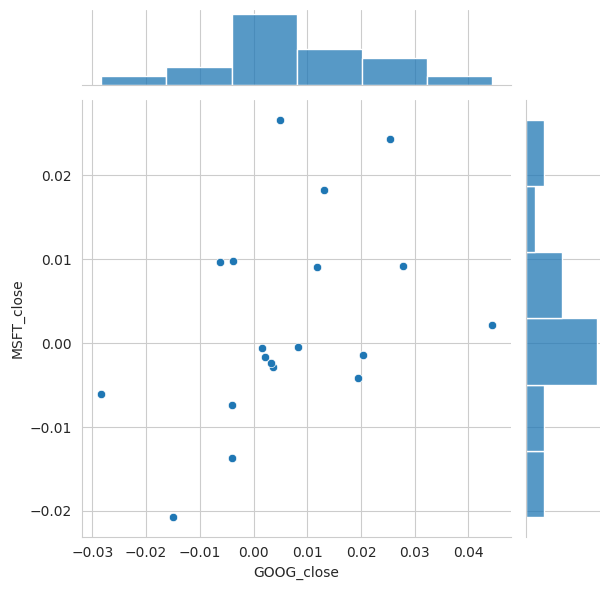

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='GOOG_close', y='MSFT_close', data=tech_returns, kind='scatter')

# Display the plot
plt.show()

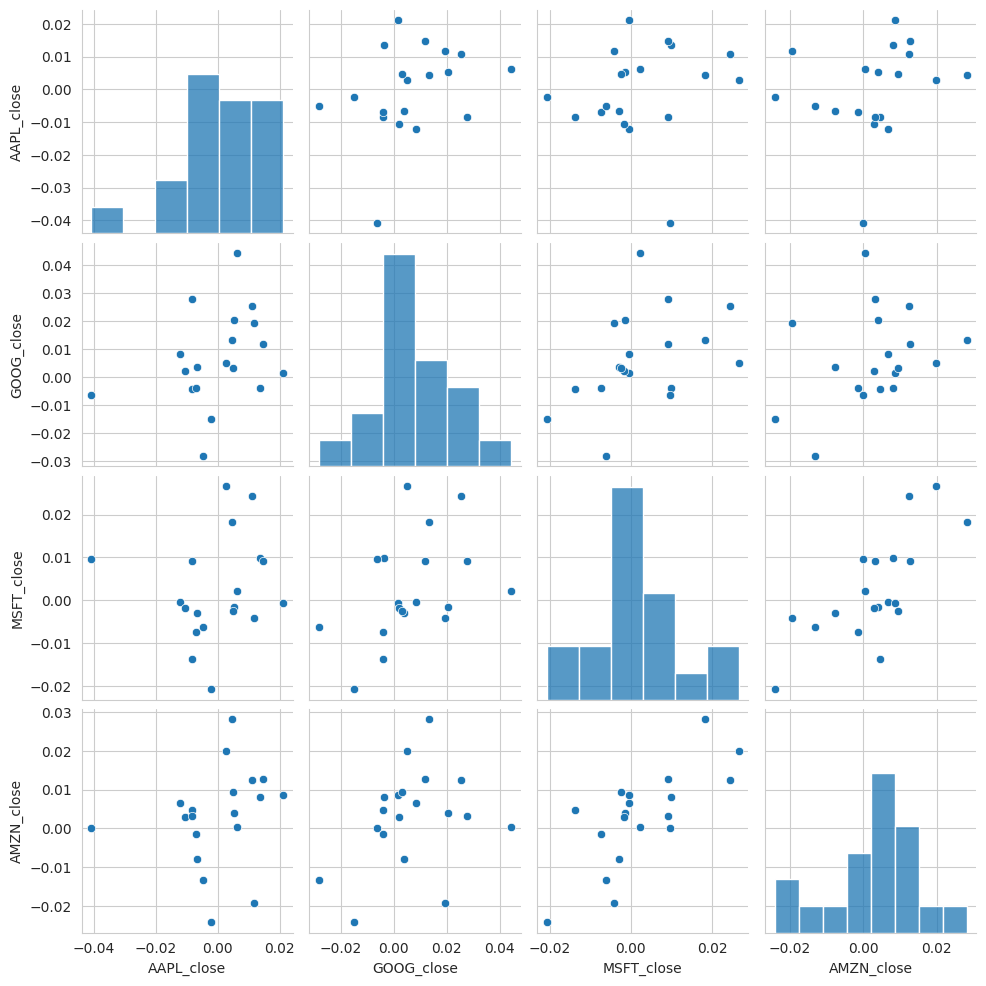

In [36]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())
plt.show()

Above we can see all the relationships on daily returns between all the stocks.

We can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

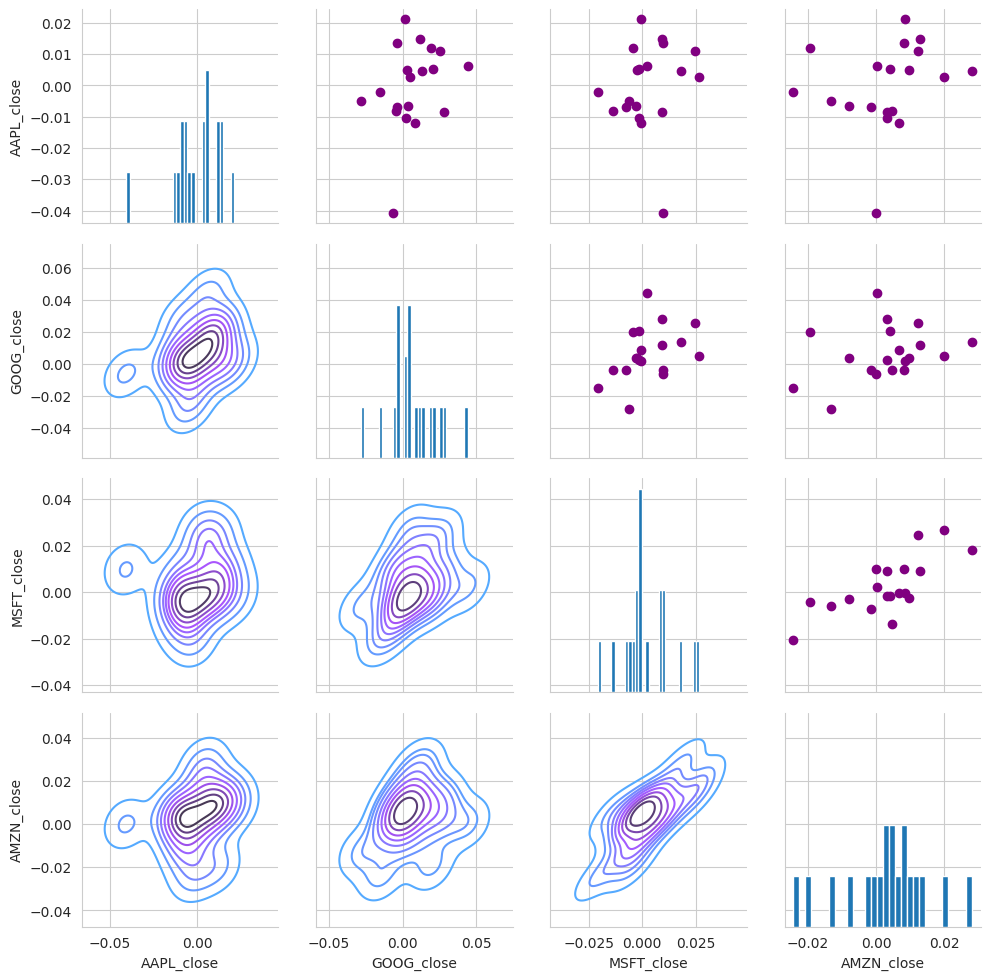

In [37]:
import warnings
warnings.filterwarnings('ignore')
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


plt.show()

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

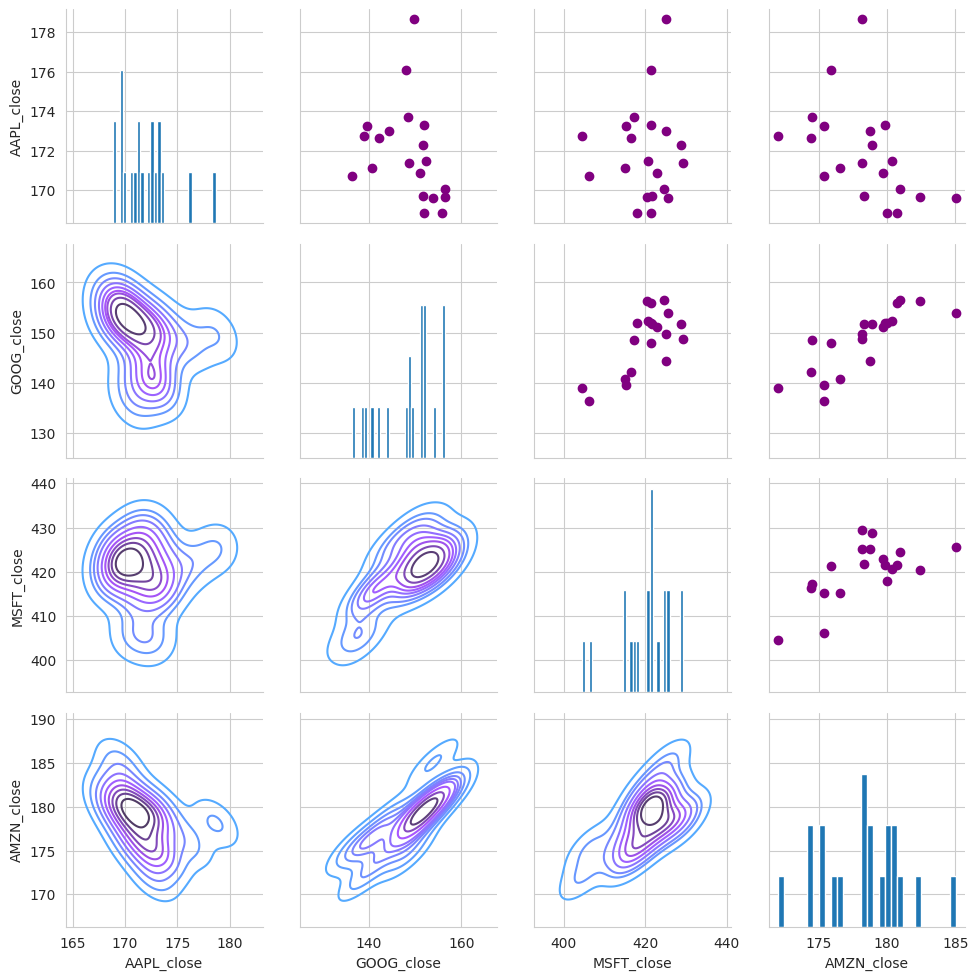

In [38]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

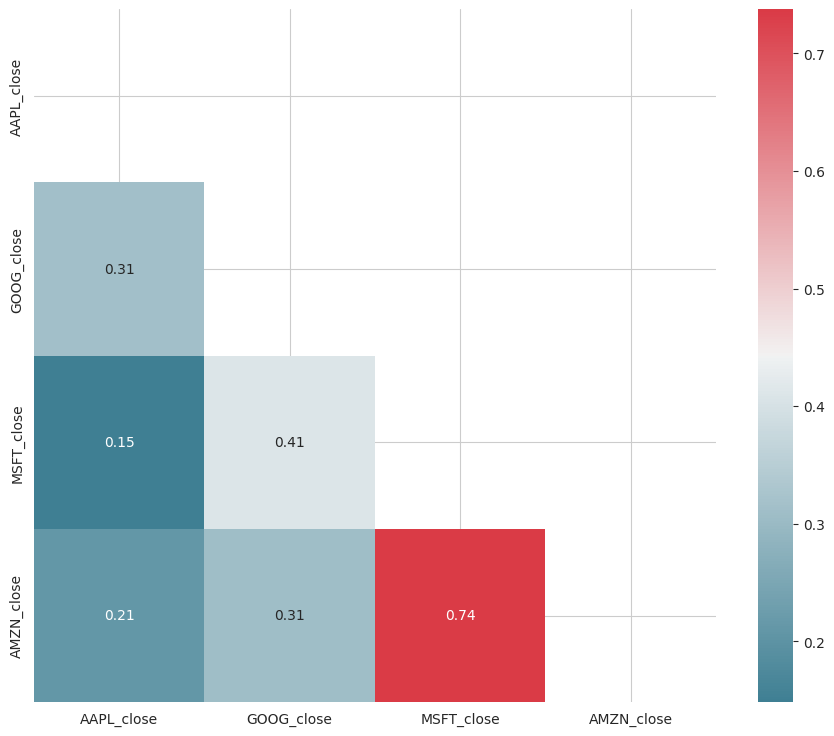

In [39]:
corr = tech_returns.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

We've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

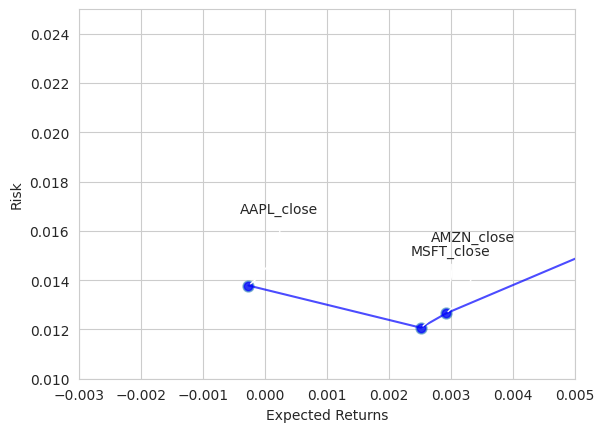

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Let's assume 'rets' is your DataFrame and is already defined
rets = tech_returns.dropna()

area = np.pi*20

# Create the scatter plot
plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)

# Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])

# Connect the dots
# Sort the data by expected returns to make the line more meaningful
sorted_rets = rets.mean().sort_values()
sorted_index = sorted_rets.index
sorted_risk = rets.std().reindex(sorted_index)

# Plot a line between the dots
plt.plot(sorted_rets, sorted_risk, linestyle='-', marker='o', color='blue', alpha=0.7)

# Label the scatter plots
for label, x, y in zip(sorted_index, sorted_rets, sorted_risk):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

# Show the plot
plt.show()


Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

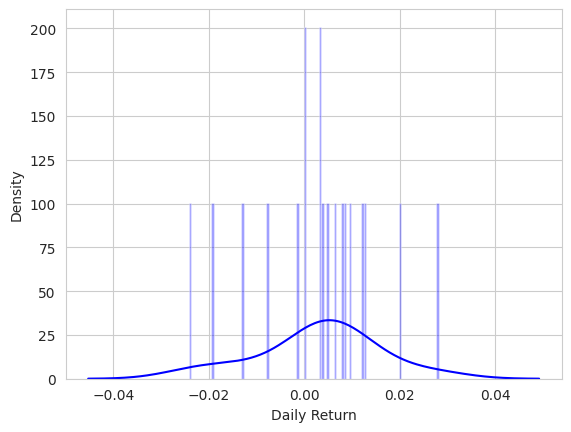

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_frames['AMZN']['Daily Return'].dropna(),bins=100,color='blue')
plt.show()


Now we can use quantile to get the risk value for the stock.

In [43]:
rets.head()

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
1,0.011832,0.019444,-0.004185,-0.019333
2,0.002779,0.004894,0.026599,0.019946
3,-0.012123,0.008237,-0.000433,0.006642
4,0.010927,0.025361,0.024380,0.012432
5,-0.002197,-0.015034,-0.020695,-0.024224


In [53]:
emp = rets['AAPL_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.014996095070143422


The 0.05 empirical quantile of daily returns is at -0.014996095070143422
The 0.05 empirical quantile of daily returns is at -0.014. That means that with 95% confidence, our worst daily loss will not exceed 1.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.014 * 1,000,000 = $14,000.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

Firstly, for specifying a model, We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) - past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation: GBM Equation

Where, S is the stock price, μ
 is the expected return (which we calculated earlier), σ
 is the standard deviation of the returns, t is time, and ϵ
 is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price. Now GBM Equation

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. This is simply a way of scaling the standard deviation.

For more info on the Monte Carlo method for stocks, check out the following link: How to use Monte Carlo simulation with GBM

Secondly, to demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame 'GOOG'

In [54]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOG_close
mu = rets.mean()['GOOG_close']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG_close']

In [55]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in range(1, days):

        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [57]:
data_frames['GOOG'].head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,136.29,138.985,134.800,135.035,2024-03-08,GOOG,26495160,HISTORICAL_PRICES,GOOG,,...,134.800,26495160,135.035,136.29,138.985,134.800,26495160,"Mar 8, 24",0.00,0.0000
1,138.94,139.980,137.070,137.070,2024-03-11,GOOG,22536365,HISTORICAL_PRICES,GOOG,,...,137.070,22536365,137.070,138.94,139.980,137.070,22536365,"Mar 11, 24",2.65,0.0194
2,139.62,140.280,138.210,138.250,2024-03-12,GOOG,19019696,HISTORICAL_PRICES,GOOG,,...,138.210,19019696,138.250,139.62,140.280,138.210,19019696,"Mar 12, 24",0.68,0.0049
3,140.77,142.190,140.010,140.060,2024-03-13,GOOG,19636999,HISTORICAL_PRICES,GOOG,,...,140.010,19636999,140.060,140.77,142.190,140.010,19636999,"Mar 13, 24",1.15,0.0082
4,144.34,144.730,141.485,142.300,2024-03-14,GOOG,36117913,HISTORICAL_PRICES,GOOG,,...,141.485,36117913,142.300,144.34,144.730,141.485,36117913,"Mar 14, 24",3.57,0.0254


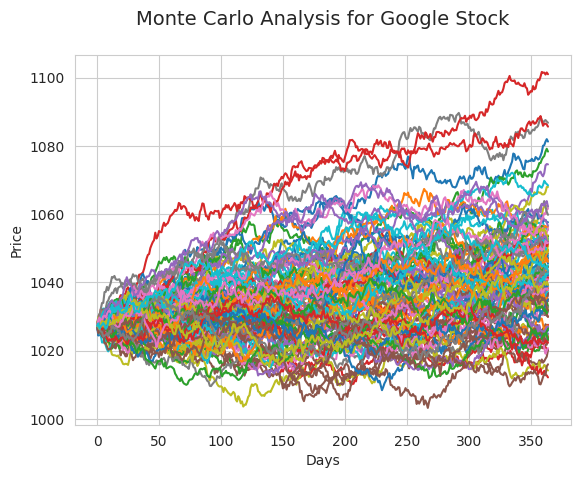

In [58]:
start_price = 1027.27

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google Stock\n', fontsize = 14)
plt.show()

In [59]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

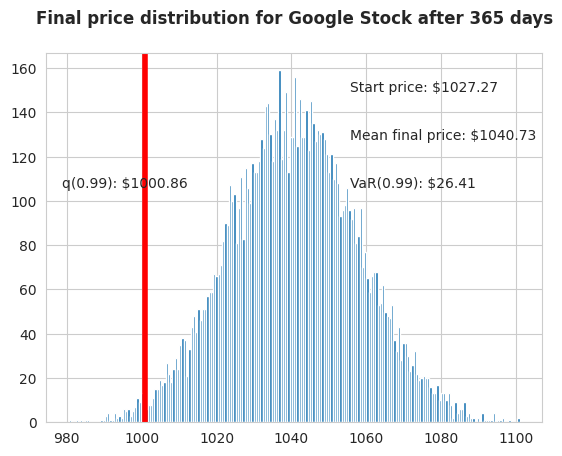

In [60]:
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days\n" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be 26.41 dollar for every investment of 1027.27 dollar (the price of one inital google stock).

This means for every initial stock you purchase, you are putting about $26.41 at risk 99% of the time from our Monte Carlo Simulation.